# ISLP - Chapter 10 - Exercise 6
### Author: pzuehlke

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import optimize

We begin by defining $ R $:

In [20]:
R = lambda beta: np.sin(beta) + beta / 10

__6 (a):__

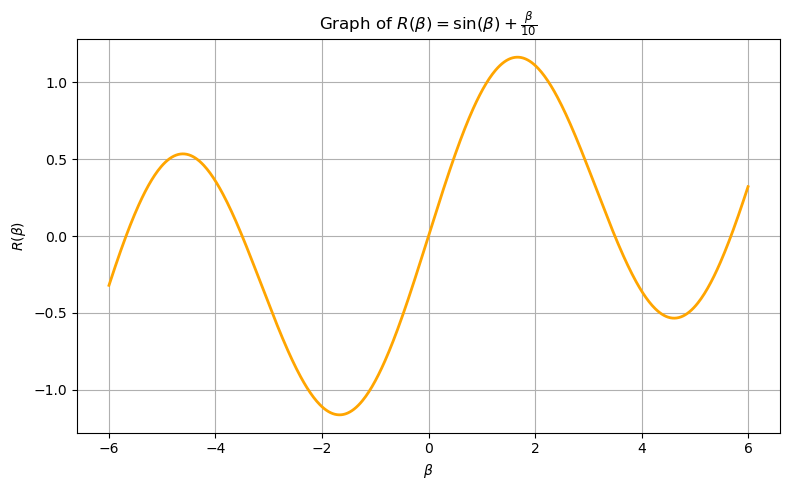

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
xs = np.linspace(-6, 6, 601)
ys = R(xs)
ax.plot(xs, ys, color="orange", linewidth='2')
ax.set_title("Graph of $ R(\\beta) = \\sin(\\beta) + \\frac{\\beta}{10} $")
ax.set_xlabel("$ \\beta $")
ax.set_ylabel("$ R(\\beta) $")
ax.grid(True)
plt.tight_layout()
plt.show()

__6 (b):__ By elementary Calculus, the derivative is:
$$
    R'(\beta) = \cos(\beta) + \frac{1}{10}\,.
$$
Alternatively, the (exact) derivative can be computed with the help of the SymPy
package as follows:

In [ ]:
beta = sym.Symbol("beta")
R = sym.sin(beta) + beta / 10
dR_dbeta = sym.diff(R, beta)
display(dR_dbeta)

cos(beta) + 1/10

Let's change back to the non-symbolic representation of $ R $ and define its
derivative as a Python function as well, since this will be needed below:

In [23]:
R = lambda beta: np.sin(beta) + beta / 10
dR_dbeta = lambda beta: np.cos(beta) + 1 / 10

__6 (c):__ We first create a procedure that encapsulates gradient descent in the case of a single-variable function $ f(x) $:

In [24]:
def gradient_descent(start_x, df_dx, learning_rate=0.1, tol=1e-6, max_iter=100):
    x = start_x
    xs = [x]

    for i in range(max_iter):
        gradient = df_dx(x)
        new_x = x - learning_rate * gradient
        xs.append(new_x)
        if abs(new_x - x) < tol:
            break
        x = new_x

    return xs

Now we compute the sequence of $ \beta $ values generated by gradient descent and plot them
on the graph of $ R $. Again, we will encapsulate this in the form of a procedure because
we will have to repeat our work in item (d):

In [60]:
def plot_gradient_descent_for_R(beta_0=2.3, rho=0.1):
    rho = 0.1
    nodes = np.array(gradient_descent(beta_0, dR_dbeta, rho))
    R_values = R(nodes)


    fig, ax = plt.subplots(figsize=(8, 5))
    x_min, x_max = np.min(nodes), np.max(nodes)
    xs = np.linspace(x_min - 0.5, x_max + 0.5, 501)
    ys = R(xs)
    ax.plot(xs, ys, color="orange", linewidth='2')
    ax.scatter(nodes, R_values, s=30, zorder=10)  # overlay the scatterplot on the graph with zorder
    endpoints = np.array([nodes[0], nodes[-1]])   
    # Distinguish the initial and final values of beta using a red marker:
    ax.scatter(endpoints, R(endpoints), s=50, zorder=30, color="red")  
    ax.set_title(f"Gradient descent applied to $ R $ with starting value $ \\beta_0 = {beta_0} $")
    ax.set_xlabel("$ \\beta $")
    ax.set_ylabel("$ R(\\beta) $")
    ax.grid(True)
    plt.tight_layout()
    plt.show()

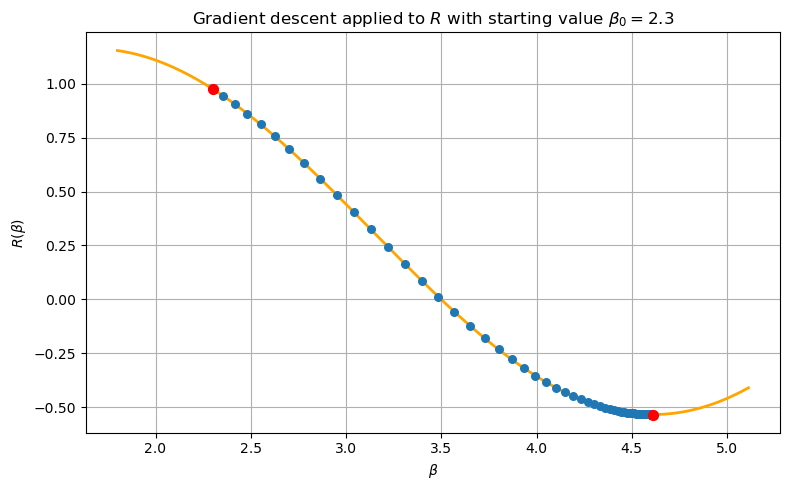

In [61]:
plot_gradient_descent_for_R(2.3, 0.1)

Let's inspect the final value of $ \beta $:

In [43]:
print(f"Final value of beta: {nodes[-1]:.4f}")

Final value of beta: 4.6120


Finally, let's compare this against the value obtained using SciPy:

In [ ]:
initial_guess = 2.0
result = optimize.minimize(R, initial_guess)
beta_min = result.x[0]
R_min = result.fun

print(f"A (local) minimum value of R occurs at beta = {beta_min:.4f}")

A (local) minimum value of R occurs at beta = 4.6122


__6 (d):__ We just need to call our plotting procedure from item (c) using a different starting value:

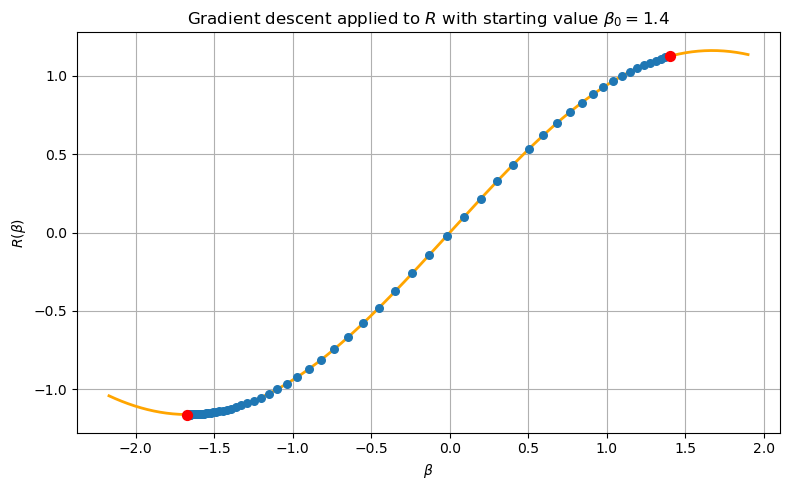

In [62]:
plot_gradient_descent_for_R(1.4, 0.1)

We see from the plot that with this new initial value, gradient descent has
converged to a local minimum which is distinct from the one obtained in item
(c).

Let's check that the approximate minima yielded by gradient descent and SciPy
are close to each other:

In [65]:
initial_guess = 1.4
gradient_descent_min = gradient_descent(initial_guess, dR_dbeta, rho)[-1]
result = optimize.minimize(R, initial_guess)
beta_min = result.x[0]
R_min = result.fun

print(f"Approximate local minimum computed with SciPy   = {beta_min:.4f}")
print(f"Approximate local minimum with gradient descent = {gradient_descent_min:.4f}")

Approximate local minimum computed with SciPy   = -1.6710
Approximate local minimum with gradient descent = -1.6705
